In [1]:
import tensorflow
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Flatten
from keras.applications.vgg16 import VGG16

In [2]:
conv_base = VGG16(
    weights='imagenet',
    include_top = False,
    input_shape=(150,150,3)
)

In [3]:
conv_base.trainable = True

set_trainable = False

for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False

for layer in conv_base.layers:
  print(layer.name,layer.trainable)

input_1 False
block1_conv1 False
block1_conv2 False
block1_pool False
block2_conv1 False
block2_conv2 False
block2_pool False
block3_conv1 False
block3_conv2 False
block3_conv3 False
block3_pool False
block4_conv1 False
block4_conv2 False
block4_conv3 False
block4_pool False
block5_conv1 True
block5_conv2 True
block5_conv3 True
block5_pool True


In [4]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [5]:
model = Sequential()

model.add(conv_base)
model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [6]:
# generators
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:/Material/Sem5/AI/Research/TLT/train',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = 'C:/Material/Sem5/AI/Research/TLT/test',
    labels='inferred',
    label_mode = 'int',
    batch_size=32,
    image_size=(150,150)
)

Found 5536 files belonging to 2 classes.
Found 2373 files belonging to 2 classes.


In [7]:
# Normalize
def process(image,label):
    image = tensorflow.cast(image/255. ,tensorflow.float32)
    return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [8]:
model.compile(
    optimizer=keras.optimizers.legacy.RMSprop(lr=1e-4),
    loss='binary_crossentropy',
    metrics=['accuracy']
  )

c:\Users\91885\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\optimizers\legacy\rmsprop.py:144: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


In [9]:
history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
173/173 [==============================] - 206s 1s/step - loss: 0.5185 - accuracy: 0.7484 - val_loss: 0.5341 - val_accuracy: 0.7177
Epoch 2/10
173/173 [==============================] - 217s 1s/step - loss: 0.3656 - accuracy: 0.8410 - val_loss: 0.3207 - val_accuracy: 0.8571
Epoch 3/10
173/173 [==============================] - 214s 1s/step - loss: 0.2708 - accuracy: 0.8904 - val_loss: 0.2889 - val_accuracy: 0.8778
Epoch 4/10
173/173 [==============================] - 214s 1s/step - loss: 0.2097 - accuracy: 0.9194 - val_loss: 0.4118 - val_accuracy: 0.8373
Epoch 5/10
173/173 [==============================] - 214s 1s/step - loss: 0.1611 - accuracy: 0.9413 - val_loss: 0.5272 - val_accuracy: 0.8601
Epoch 6/10
173/173 [==============================] - 214s 1s/step - loss: 0.1094 - accuracy: 0.9594 - val_loss: 0.4377 - val_accuracy: 0.8887
Epoch 7/10
173/173 [==============================] - 214s 1s/step - loss: 0.1032 - accuracy: 0.9688 - val_loss: 0.4334 - val_accuracy: 0.8812

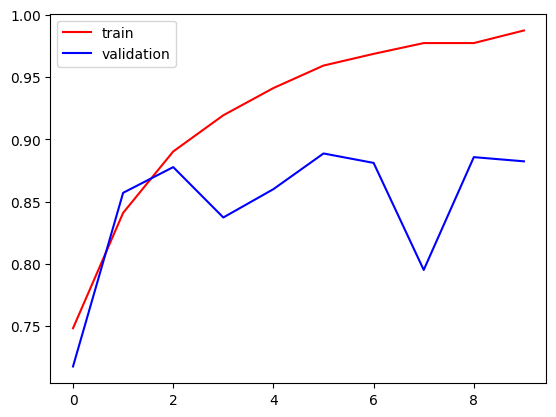

In [10]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

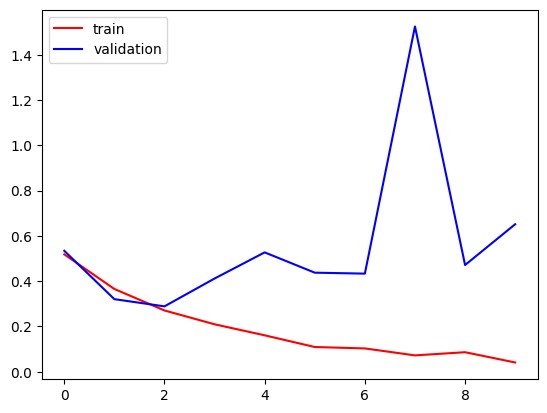

In [11]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [12]:
model.save('3TL')

INFO:tensorflow:Assets written to: 3TL\assets


INFO:tensorflow:Assets written to: 3TL\assets
